In [1]:
import torch
from torch.utils.data import DataLoader
from models.transformer import Transformer, create_look_ahead_mask
from dataset_extracted import ExtractedFeatureDataset
import sentencepiece as spm
import transforms
import matplotlib.pyplot as plt
import numpy as np

In [16]:
train_feature_path = '../MVAD/I3D_rgb_kinetics/train'
train_corpus_file = '../MVAD/corpus_M-VAD_train.txt'
test_feature_path = '../MVAD/I3D_rgb_kinetics/test'
test_corpus_file = '../MVAD/corpus_M-VAD_test.txt'
tokenizer_file = 'tokenizer.model'
inp_max_seq_length = 256
tar_max_seq_length = 360

In [3]:
sp = spm.SentencePieceProcessor()
sp.Load(tokenizer_file)

True

In [4]:
feature_transform = transforms.Compose([
    transforms.FeaturePadding(inp_max_seq_length)
])
caption_transform = transforms.Compose([
    transforms.CaptionPadding(tar_max_seq_length, sp.PieceToId('<PAD>'))
])

In [17]:
train_dataset = ExtractedFeatureDataset(train_feature_path, train_corpus_file, 256, 360, sp, feature_transform, caption_transform)
train_dataloader = DataLoader(train_dataset, 1)

test_dataset = ExtractedFeatureDataset(test_feature_path, test_corpus_file, 256, 360, sp, feature_transform, caption_transform)
test_dataloader = DataLoader(test_dataset, 1)

In [6]:
train_video_length = []
train_corpus_length = []

test_video_length = []
test_corpus_length = []

In [7]:
for batch, sample in enumerate(train_dataloader, start=1):
    inp_key_padding = sample[3]
    inp_length = inp_max_seq_length - inp_key_padding.sum()
    tar_key_padding = sample[4]
    tar_length = tar_max_seq_length - tar_key_padding.sum()
    train_video_length.append(int(inp_length))
    train_corpus_length.append(int(tar_length))
    
for batch, sample in enumerate(test_dataloader, start=1):
    inp_key_padding = sample[3]
    inp_length = inp_max_seq_length - inp_key_padding.sum()
    tar_key_padding = sample[4]
    tar_length = tar_max_seq_length - tar_key_padding.sum()
    test_video_length.append(int(inp_length))
    test_corpus_length.append(int(tar_length))

max: 222 min: 1 average: 18.59 std: 7.5554
90% percentile: 26.0
5% percentile: 12.0 95% percentile: 30.0


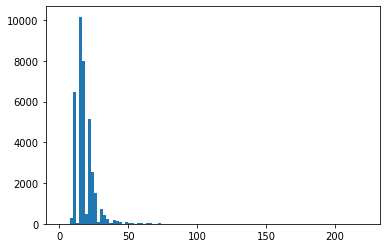

In [25]:
plt.hist(train_video_length, bins=100)
print('max: {} min: {} average: {:.2f} std: {:.4f}'.format(max(train_video_length), min(train_video_length), np.mean(train_video_length), np.std(train_video_length)))
print('90% percentile: {}'.format(np.percentile(train_video_length, 90)))
print('5% percentile: {} 95% percentile: {}'.format(np.percentile(train_video_length, 5), np.percentile(train_video_length, 95)))

max: 338 min: 5 average: 17.60 std: 11.1420
5% percentile: 8.0 95% percentile: 35.0


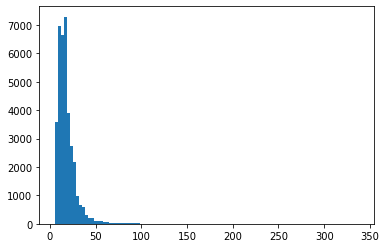

In [21]:
plt.hist(train_corpus_length, bins=100);
print('max: {} min: {} average: {:.2f} std: {:.4f}'.format(max(train_corpus_length), min(train_corpus_length), np.mean(train_corpus_length), np.std(train_corpus_length)))
print('5% percentile: {} 95% percentile: {}'.format(np.percentile(train_corpus_length, 5), np.percentile(train_corpus_length, 95)))

max: 165 min: 9 average: 18.83 std: 8.9561
5% percentile: 12.0 95% percentile: 33.0


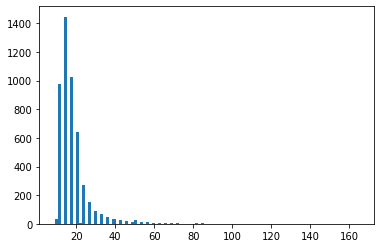

In [22]:
plt.hist(test_video_length, bins=100);
print('max: {} min: {} average: {:.2f} std: {:.4f}'.format(max(test_video_length), min(test_video_length), np.mean(test_video_length), np.std(test_video_length)))
print('5% percentile: {} 95% percentile: {}'.format(np.percentile(test_video_length, 5), np.percentile(test_video_length, 95)))

max: 249 min: 6 average: 18.20 std: 13.1777
5% percentile: 7.0 95% percentile: 41.0


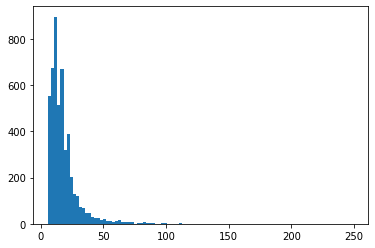

In [24]:
plt.hist(test_corpus_length, bins=100);
print('max: {} min: {} average: {:.2f} std: {:.4f}'.format(max(test_corpus_length), min(test_corpus_length), np.mean(test_corpus_length), np.std(test_corpus_length)))
print('5% percentile: {} 95% percentile: {}'.format(np.percentile(test_corpus_length, 5), np.percentile(test_corpus_length, 95)))

In [11]:
f = open('../MVAD/train_fine', 'w+')
for batch, sample in enumerate(train_dataloader, start=1):
    inp_key_padding = sample[3]
    inp_length = inp_max_seq_length - inp_key_padding.sum()
    tar_key_padding = sample[4]
    tar_length = tar_max_seq_length - tar_key_padding.sum()
    if 7 < inp_length < 50 and 7 < tar_length < 50:
        feature_file = sample[2]
        f.write(feature_file[0] + '\n')
f.close()

In [18]:
f = open('../MVAD/test_fine', 'w+')
for batch, sample in enumerate(test_dataloader, start=1):
    inp_key_padding = sample[3]
    inp_length = inp_max_seq_length - inp_key_padding.sum()
    tar_key_padding = sample[4]
    tar_length = tar_max_seq_length - tar_key_padding.sum()
    if 7 < inp_length < 50 and 7 < tar_length < 50:
        feature_file = sample[2]
        f.write(feature_file[0] + '\n')
        
f.close()

In [ ]:
# Feature: 7 ~ 50
# Caption: 7 ~ 50